In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import math
import random
from sklearn.model_selection import train_test_split


# **pol regression**

1.  REMEMBER TO TRY AND SORT OUT POLYNOMIAL REG EVAL



In [ ]:
poly_data = pd.read_csv('Task1 - dataset - pol_regression.csv')

In [ ]:
print(poly_data)

    Unnamed: 0         x           y
0            0  0.507979    2.238321
1            1  2.081478  -13.104269
2            2 -2.090953  -10.895881
3            3  0.108276   -1.580098
4            4  3.929470    9.174928
5            5  3.962931    3.237086
6            6 -3.744147  -72.556875
7            7 -2.927571  -29.934683
8            8 -4.485328 -125.275943
9            9 -0.591902    1.586948
10          10 -4.701238 -155.192926
11          11 -0.431668    0.737940
12          12  1.491440   -3.133557
13          13 -2.215127    2.772584
14          14  1.762549  -13.629526
15          15  0.908628   -7.818825
16          16 -4.760181 -162.084241
17          17  0.588541  -15.192640
18          18 -2.407476  -15.690391
19          19 -0.848988   -2.259106


In [ ]:
data_x = (poly_data['x'])
data_y = (poly_data['y'])

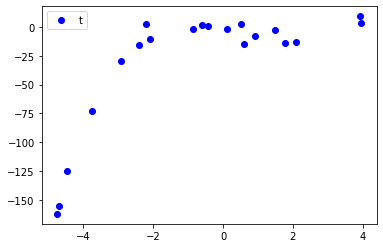

In [ ]:
plt.clf()
plt.plot(data_x,data_y, 'bo')
plt.legend(('training points'))
#plt.hold(True)
plt.savefig('trainingdata.png')
plt.show()

In [ ]:
def getPolynomialDataMatrix(x, degree):
    X = np.ones(x.shape)
    for i in range(1, degree + 1):
        X = np.column_stack((X, x ** i))
    return X

In [ ]:
def pol_regression(features_train, y_train, degree):
  polyMatrix = getPolynomialDataMatrix(features_train, degree)
  #produces a data matrix of the inputs column based on the degree of polynomial
  PolyMatrix_xT = polyMatrix.transpose().dot(polyMatrix)
  arrTemp = np.ones(1,) #1d 1x1 array
  if degree == 0:
    #deg 0 means its just the mean of the values
    y_avg = np.average(y_train) #returns the mean of the Y
    avgArr = np.multiply(arrTemp, y_avg) #make the array contain the mean value
    return avgArr
  else:
    parameters = np.linalg.solve(PolyMatrix_xT, polyMatrix.transpose().dot(y_train))##least squares solution

    return parameters



In [ ]:
def yplot(data, parameters):
  length = len(parameters)
  y = 0
  for i in range(length):
    y += parameters[i]*data**i
  return y

[-30.43005773]


<Figure size 432x288 with 0 Axes>

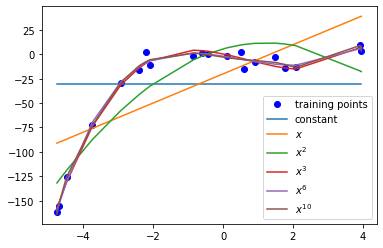

In [ ]:
def regressionGraph():

  sortX = np.sort(data_x)

  plt.clf()

  plt.figure()
  plt.plot(data_x, data_y, 'bo')
  #plots the base outputs based on inputs

  poly_deg0 = pol_regression(data_x, data_y, 0)
  poly_deg1 = pol_regression(data_x, data_y, 1)
  poly_deg2 = pol_regression(data_x, data_y, 2)
  poly_deg3 = pol_regression(data_x, data_y, 3)
  poly_deg6 = pol_regression(data_x, data_y, 6)
  poly_deg10 = pol_regression(data_x, data_y, 10)
  #works out the polynomial regression based on the different degree



  plt.plot(sortX, yplot(sortX, poly_deg0))
  plt.plot(sortX, yplot(sortX, poly_deg1))
  plt.plot(sortX, yplot(sortX, poly_deg2))
  plt.plot(sortX, yplot(sortX, poly_deg3))
  plt.plot(sortX, yplot(sortX, poly_deg6))
  plt.plot(sortX, yplot(sortX, poly_deg10))
  # plots the polynomials by using a yplot fuction that formats the data to be plotted
  plt.legend(('training points', 'constant', '$x$', '$x^2$', '$x^3$','$x^6$','$x^{10}$'))


  plt.savefig('polyRegression.png')
  #plt.hold(True)

  plt.show()


regressionGraph()

<Figure size 432x288 with 0 Axes>

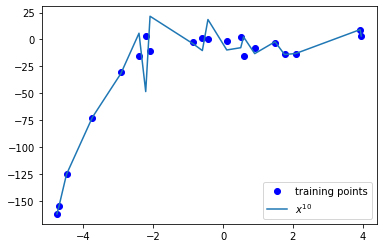

In [ ]:
def regressionGraph2():

  sortX = np.sort(data_x)

  plt.clf()

  plt.figure()
  plt.plot(data_x, data_y, 'bo')
  #plots the base outputs based on inputs

  poly_deg0 = pol_regression(data_x, data_y, 0)
  poly_deg1 = pol_regression(data_x, data_y, 1)
  poly_deg2 = pol_regression(data_x, data_y, 2)
  poly_deg3 = pol_regression(data_x, data_y, 3)
  poly_deg6 = pol_regression(data_x, data_y, 6)
  poly_deg10 = pol_regression(data_x, data_y, 17)
  #works out the polynomial regression based on the different degree


  #plt.plot(sortX, yplot(sortX, poly_deg3))
  #plt.plot(sortX, yplot(sortX, poly_deg6))
  plt.plot(sortX, yplot(sortX, poly_deg10))
  # plots the polynomials by using a yplot fuction that formats the data to be plotted
  plt.legend(('training points','$x^{10}$'))


  plt.savefig('polyRegression2.png')
  #plt.hold(True)

  plt.show()


regressionGraph2()

In [ ]:
def eval_pol_regression(parameters, x, y, degree):
  mX = getPolynomialDataMatrix(x, degree)
  #matrix of the input column
  mseOut = np.square(np.subtract(mX.dot(parameters) , y)).mean() 
  #works out the mse
  rmseOut = math.sqrt(mseOut)
  #square roots the mse to get root mean squared error

  return rmseOut

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

In [ ]:
rmseTest = np.zeros((10,1))
rmseTrain = np.zeros((10,1))

In [ ]:
for i in range(1,11):
  polyReg = pol_regression(x_train, y_train, i)#getting weighting
  rmseTrain[i-1] = eval_pol_regression(polyReg,x_train, y_train, i)#saving rmse for training/testing
  rmseTest[i-1] = eval_pol_regression(polyReg,x_test, y_test, i)



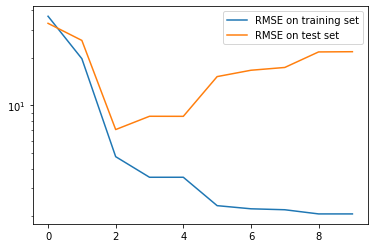

In [ ]:
plt.figure();#plotting points
plt.semilogy(range(0,10), rmseTrain)
plt.semilogy(range(0,10), rmseTest)
plt.legend(('RMSE on training set', 'RMSE on test set'))
plt.show()

# **K- Means Clustering**


In [ ]:
dataframe = pd.read_csv("Task2 - dataset - dog_breeds.csv")
data= dataframe.values
featureCol = dataframe.columns 

# gets the data and the column labels

In [ ]:
def compute_euclidean_distance(vec1, vec2):    
   #Computers the distance between two clustoids
    length = len(vec1)
    distance = 0
    for i in range(length):
        distance += pow(vec1[i] - vec2[i],2) #gets the hypotenuse distance between two points
    return np.sqrt(distance)


In [ ]:
def initialise_centroids(dataset, k): 
#assigns first centroids at random points in data based on the K which is the
#amount of groups wanted
    centroids = np.zeros([k,4]) # makes the centroid an array with 4 features
    for i in range(k):#fills the centroids with randomly selected values from the features
        randomInt = np.random.randint(0,len(dataset))
        centroids[i] = dataset[randomInt]    
    return centroids

In [ ]:
def error_func_print(obj):# function to print the objective 
#function (error function) of the algorithm
  plt.plot(range(len(obj)), obj, label='Error Function')
  plt.xlabel("Iteration step")
  plt.ylabel("Objective Function")
  plt.legend()
  plt.show()

In [ ]:
def kmeans(dataset, k):
    centroids = initialise_centroids(dataset, k)
    #initalising first centroids to be used to cluster groups

    cluster_assigned = np.zeros(len(dataset)) 
    errorFunc = 0 
    objlist = [] 
    #used to work out the error functions
    for i in range(10):
      #iterations of the algorithm to group the data 
        dist = np.zeros(k)
        #variable to hold the closest neigbour whilst iterating through the algorithm
        sumCent = np.zeros([k,4])
        newCent = np.zeros([k,4])
        #used for holding new and onld centroids 
        for location in range(len(dataset)):
          #goes through all of the values within the dataset 
            for centroid in range(k):
                dist[centroid] = compute_euclidean_distance(dataset[location], centroids[centroid])
                #gets the distance between the current centroids and the nearest centroids
           
            closest = np.where(dist == np.min(dist))[0][0]
            #checks if the current clusteroid is the closest clustoid

            errorFunc += dist[closest]  
            cluster_assigned[location] = closest      
            sumCent[closest] += dataset[location]
            #adds the coordinates of the closest point to the cluster to group.
      
        for centroid in range(k):
            for j in range(4):
              #goes through each feature in the centroid
                newCent[centroid][j] = sumCent[centroid][j] / len(dataset[cluster_assigned == centroid]) 
                #uses the average value of each feature to get the next centroids location.
        
        
        objlist.append(errorFunc)
        errorFunc = 0 
        centroids = newCent 
    
    #prints the errpr function
    error_func_print(objlist)
    return centroids, cluster_assigned  


In [ ]:
def plotK(dataset, centroids, cluster_assigned, x, y, labels):

    plt.scatter(dataset[:,x],dataset[:,y], c = cluster_assigned)
    #sets up the columns to display the clusters on
    plt.scatter(centroids[:,x], centroids[:,y], c = 'hotpink')
    plt.xlabel(labels[x])
    plt.ylabel(labels[y])
    #gets the column name
    plt.show()   

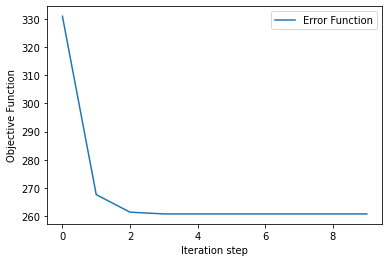

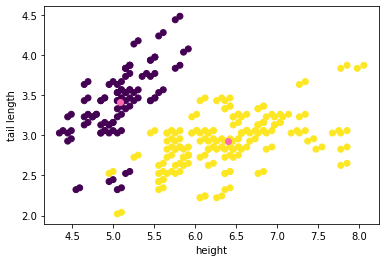

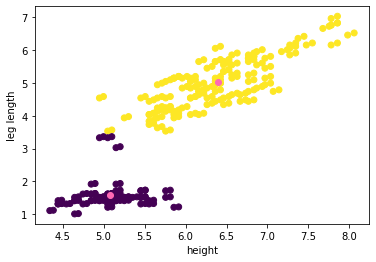

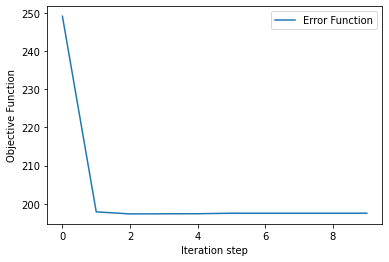

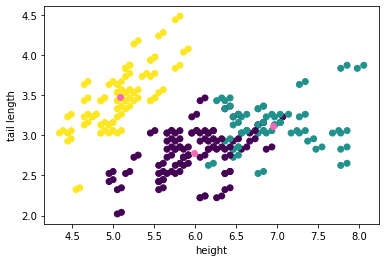

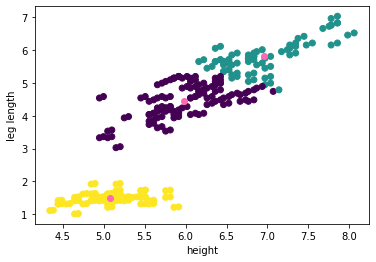

In [ ]:

centK2, clusterAsK2 = kmeans(data, 2)

plotK(data, centK2, clusterAsK2, 0,1,featureCol) #height and tail plot
plotK(data, centK2, clusterAsK2, 0,2,featureCol) #height and leg plot

centK3, clusterAsK3 = kmeans(data, 3)
plotK(data, centK3, clusterAsK3, 0,1,featureCol)
plotK(data, centK3, clusterAsK3, 0,2,featureCol) 

# TRAINING **MODELS**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

In [ ]:
pd_dataframe = pd.read_csv('Task3 - dataset - HIV RVG.csv')

control_dataframe = pd_dataframe.loc[pd_dataframe['Participant Condition'] == "Control"]
patient_dataframe = pd_dataframe.loc[pd_dataframe['Participant Condition'] == "Patient"]



In [ ]:
control_dataframe.describe()

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,128.557867,6.252926,1.552666,0.615071,1.558109,0.765318,0.982531,0.742884
std,53.059494,4.027929,0.497380,0.262763,0.377500,0.171403,0.128047,0.156512
min,5.000000,1.000000,1.000000,0.131221,0.392472,0.362244,0.489722,0.368800
25%,93.000000,3.000000,1.000000,0.400600,1.295942,0.632930,0.911628,0.620259
50%,131.000000,6.000000,2.000000,0.623514,1.518908,0.789629,0.983633,0.753050
75%,180.000000,9.000000,2.000000,0.808386,1.793973,0.899102,1.054572,0.866474
max,199.000000,20.000000,2.000000,2.356406,3.376731,1.535059,1.456809,1.246102


In [ ]:
patient_dataframe.describe()

,Image number,Bifurcation number,Artery (1)/ Vein (2),Alpha,Beta,Lambda,Lambda1,Lambda2
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,87.897971,6.190931,1.591885,0.615520,1.554242,0.764979,0.980486,0.741053
std,57.334283,4.172325,0.491631,0.267580,0.396982,0.174199,0.132727,0.161678
min,1.000000,1.000000,1.000000,0.092770,0.283299,0.304582,0.390920,0.309526
25%,38.000000,3.000000,1.000000,0.404123,1.284736,0.635707,0.911804,0.617984
50%,80.000000,5.000000,2.000000,0.618396,1.511789,0.786381,0.984126,0.759125
75%,148.000000,9.000000,2.000000,0.810104,1.802099,0.900058,1.059720,0.864406
max,203.000000,25.000000,2.000000,2.350897,3.169293,1.533264,1.467637,1.232208


In [ ]:

#processing the data to be normalised
xd = pd_dataframe.iloc[:,0:7]
pd_dataframe.iloc[:,0:7] = (xd-xd.min())/ (xd.max() - xd.min())

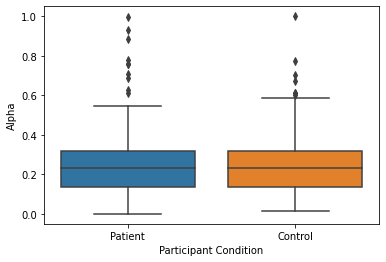

In [ ]:
sb.boxplot(x="Participant Condition", y= "Alpha", data= pd_dataframe)

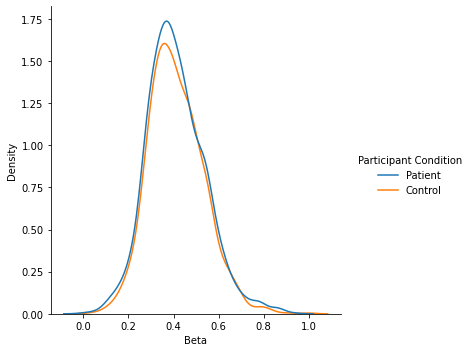

In [ ]:
sb.displot(data=pd_dataframe, x="Beta", hue="Participant Condition", kind="kde")

In [ ]:
#target_column = ['Participant Condition']
#predict_vals = list(set(list(pd_dataframe.columns))-set(target_column))
#fArr= pd_dataframe[predict_vals].values
#tArr = pd_dataframe[target_column].values
#x_train, x_test, y_train, y_test = train_test_split(fArr, tArr, test_size=0.10)
epochList=[50,150,150,200,250,300,500]

In [ ]:
x = pd_dataframe.drop('Participant Condition', axis= 1)
y = pd_dataframe['Participant Condition']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [ ]:
def _Ann(x_train, x_test, y_train, y_test, neurons, epochs):
  AnnClassifer = MLPClassifier(hidden_layer_sizes=(neurons,neurons), max_iter=epochs, activation ='logistic')
  AnnClassifer.out_activation_ = "Logistic"
  AnnClassifer.fit(x_train,y_train)
  #sets up and trains the classifier provided by sklearn with provided parameters

  predictions= AnnClassifer.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)
  #uses test data to predict the patients condition

  formatted_acc = "{:.3f}".format(accuracy)
  print("Artifical Neuron Network with epochs of "+str(epochs)+" accuracy is: "+ str(formatted_acc))

  return accuracy

In [ ]:
accList = []
ac50= _Ann(x_train, x_test, y_train, y_test, 500, 50)
accList.append(ac50)
ac100 = _Ann(x_train, x_test, y_train, y_test, 500, 100)
accList.append(ac100)
ac150 = _Ann(x_train, x_test, y_train, y_test, 500, 150)
accList.append(ac150)
ac200= _Ann(x_train, x_test, y_train, y_test, 500, 200)
accList.append(ac200)
ac250 = _Ann(x_train, x_test, y_train, y_test, 500, 250)
accList.append(ac250)
ac300 = _Ann(x_train, x_test, y_train, y_test, 500, 300)
accList.append(ac300)
ac500 = _Ann(x_train, x_test, y_train, y_test, 500, 500)
accList.append(ac500)

Artifical Neuron Network with epochs of 50 accuracy is: 0.637
Artifical Neuron Network with epochs of 100 accuracy is: 0.634
Artifical Neuron Network with epochs of 150 accuracy is: 0.606
Artifical Neuron Network with epochs of 200 accuracy is: 0.606
Artifical Neuron Network with epochs of 250 accuracy is: 0.596
Artifical Neuron Network with epochs of 300 accuracy is: 0.606
Artifical Neuron Network with epochs of 500 accuracy is: 0.630


Text(0, 0.5, 'Accuracy')

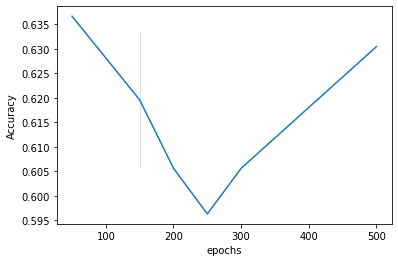

In [ ]:
lineplot = sb.lineplot(x=epochList, y=accList)
lineplot.set_xlabel("epochs", fontsize = 10)
lineplot.set_ylabel("Accuracy", fontsize = 10)

In [ ]:
def randomForest (x_train, x_test, y_train, y_test, numTree, minSamples):
  forest = RandomForestClassifier(n_estimators=numTree, min_samples_leaf=
                                  minSamples)
#sets up the forest classifier based on the parameters passed
  forest.fit(x_train,y_train)
  #trains the forest with the training data
  predictions= forest.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)
  print("Random forest with a the minimum number of samples "+str(minSamples)+
        " accuracy is: "+ str(accuracy))
  #works out the accuracy of predictions

  return accuracy

In [ ]:
forest= randomForest(x_train, x_test, y_train, y_test, 1000, 5)
forest= randomForest(x_train, x_test, y_train, y_test, 1000, 10)


Random forest with a the minimum number of samples 5 accuracy is: 0.8167701863354038
Random forest with a the minimum number of samples 10 accuracy is: 0.7763975155279503


In [ ]:
def _AnnFold(x, y, neurons, epochs):
  AnnClassifer = MLPClassifier(hidden_layer_sizes=(neurons,neurons), max_iter=epochs, activation ='logistic')
  AnnClassifer.out_activation_ = "Logistic"

  cv = KFold(n_splits=10, random_state=1, shuffle=True)
 #cross validates the model with all the folds with the accuracy score

  scores = cross_val_score(AnnClassifer, x, y, scoring='accuracy', cv=cv)
 #cross validates the model with all the folds with the accuracy score

  print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

  return scores

In [ ]:
ac500 = _AnnFold(x, y, 50, 150)
ac500 = _AnnFold(x, y, 500, 150)
ac500 = _AnnFold(x, y, 1000, 150)

Accuracy: 0.632 (0.025)
Accuracy: 0.619 (0.036)
Accuracy: 0.628 (0.033)


In [ ]:
def randomForestFold(x, y, numTree, minSamples):
  #function that initialises a forest classifier with specified samples and trees
  forest = RandomForestClassifier(n_estimators=numTree, min_samples_leaf=
                                  minSamples)
  
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
#creats 10 folds of data that is shuffled
  scores = cross_val_score(forest, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
 #cross validates the model with all the folds with the accuracy score
  print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

  return scores

In [ ]:
forest= randomForestFold(x, y, 50, 10)
forest= randomForestFold(x, y, 500, 10)
forest= randomForestFold(x, y, 10000, 10)

Accuracy: 0.781 (0.021)
Accuracy: 0.791 (0.021)
Accuracy: 0.794 (0.015)
